# Lichess game dataset
## General Info
As a passionate chess player, I am always interested in learning from how others play the game. When I saw that [Mitchell J](https://www.kaggle.com/datasnaek) uploaded a data set of just over 20,000 games collected from a selection of users on the site Lichess.org, I knew that I had to dig into it.

### Original Dataset Features
- Game ID
- Rated (T/F)
- Start Time
- End Time
- Number of Turns
- Game Status
- Winner
- Time Increment
- White Player ID
- White Player Rating
- Black Player ID
- Black Player Rating
- All Match Moves in Standard Chess Notation
- Opening Eco, the standard code for an opening
- Opening Name
- Opening Ply (Number of moves in the opening phase)

A note from [Mitchell](https://www.kaggle.com/datasnaek) on how to update the dataset:
> I collected this data using the Lichess API, which enables collection of any given users game history. The difficult part was collecting usernames to use, however the API also enables dumping of all users in a Lichess team. There are several teams on Lichess with over 1,500 players, so this proved an effective way to get users to collect games from.

### Questions of Interest
- What is the percentage of rated games?
- What is the typical length of a game on Lichess? Do time controls typically change the pace of the game? (Where in the total allowed time do games typically end?)
- For how many turns do games typically last?
- What is the typical rating differential between players? Are wins correlated to higher rating? By how much?
- Which are the most effective openings by win percentage? Least effective? Which openings are used the most at different ratings? How far do people stay in opening books, and for which openings?
- Who are the most prolific players, and what is their rating?
- Do the number of games a user plays correlate to their rating?

## Import and clean the dataset

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.display.float_format = '{:.2f}'.format

original_data = pd.read_csv('../data/lichess_games.csv')
original_data.head()

,id,rated,created_at,last_move_at,turns,victory_status,winner,increment_code,white_id,white_rating,black_id,black_rating,moves,opening_eco,opening_name,opening_ply
0,TZJHLljE,False,1504210000000.00,1504210000000.00,13,outoftime,white,15+2,bourgris,1500,a-00,1191,d4 d5 c4 c6 cxd5 e6 dxe6 fxe6 Nf3 Bb4+ Nc3 Ba5...,D10,Slav Defense: Exchange Variation,5
1,l1NXvwaE,True,1504130000000.00,1504130000000.00,16,resign,black,5+10,a-00,1322,skinnerua,1261,d4 Nc6 e4 e5 f4 f6 dxe5 fxe5 fxe5 Nxe5 Qd4 Nc6...,B00,Nimzowitsch Defense: Kennedy Variation,4
2,mIICvQHh,True,1504130000000.00,1504130000000.00,61,mate,white,5+10,ischia,1496,a-00,1500,e4 e5 d3 d6 Be3 c6 Be2 b5 Nd2 a5 a4 c5 axb5 Nc...,C20,King's Pawn Game: Leonardis Variation,3
3,kWKvrqYL,True,1504110000000.00,1504110000000.00,61,mate,white,20+0,daniamurashov,1439,adivanov2009,1454,d4 d5 Nf3 Bf5 Nc3 Nf6 Bf4 Ng4 e3 Nc6 Be2 Qd7 O...,D02,Queen's Pawn Game: Zukertort Variation,3
4,9tXo1AUZ,True,1504030000000.00,1504030000000.00,95,mate,white,30+3,nik221107,1523,adivanov2009,1469,e4 e5 Nf3 d6 d4 Nc6 d5 Nb4 a3 Na6 Nc3 Be7 b4 N...,C41,Philidor Defense,5


In [22]:
# I typically specify each column's type, but this is a tiny data set.
original_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20058 entries, 0 to 20057
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              20058 non-null  object 
 1   rated           20058 non-null  bool   
 2   created_at      20058 non-null  float64
 3   last_move_at    20058 non-null  float64
 4   turns           20058 non-null  int64  
 5   victory_status  20058 non-null  object 
 6   winner          20058 non-null  object 
 7   increment_code  20058 non-null  object 
 8   white_id        20058 non-null  object 
 9   white_rating    20058 non-null  int64  
 10  black_id        20058 non-null  object 
 11  black_rating    20058 non-null  int64  
 12  moves           20058 non-null  object 
 13  opening_eco     20058 non-null  object 
 14  opening_name    20058 non-null  object 
 15  opening_ply     20058 non-null  int64  
dtypes: bool(1), float64(2), int64(4), object(9)
memory usage: 2.3+ MB


In [3]:
original_data.describe(include='all')

,id,rated,created_at,last_move_at,turns,victory_status,winner,increment_code,white_id,white_rating,black_id,black_rating,moves,opening_eco,opening_name,opening_ply
count,20058,20058,20058.00,20058.00,20058.00,20058,20058,20058,20058,20058.00,20058,20058.00,20058,20058,20058,20058.00
unique,19113,2,NaN,NaN,NaN,4,3,400,9438,NaN,9331,NaN,18920,365,1477,NaN
top,XRuQPSzH,True,NaN,NaN,NaN,resign,white,10+0,taranga,NaN,taranga,NaN,e4 e5,A00,Van't Kruijs Opening,NaN
freq,5,16155,NaN,NaN,NaN,11147,10001,7721,72,NaN,82,NaN,27,1007,368,NaN
mean,NaN,NaN,1483616852629.09,1483617722336.14,60.47,NaN,NaN,NaN,NaN,1596.63,NaN,1588.83,NaN,NaN,NaN,4.82
std,NaN,NaN,28501509421.00,28501400588.89,33.57,NaN,NaN,NaN,NaN,291.25,NaN,291.04,NaN,NaN,NaN,2.80
min,NaN,NaN,1376771633173.00,1376771863841.00,1.00,NaN,NaN,NaN,NaN,784.00,NaN,789.00,NaN,NaN,NaN,1.00
25%,NaN,NaN,1477547500000.00,1477547500000.00,37.00,NaN,NaN,NaN,NaN,1398.00,NaN,1391.00,NaN,NaN,NaN,3.00
50%,NaN,NaN,1496010000000.00,1496010000000.00,55.00,NaN,NaN,NaN,NaN,1567.00,NaN,1562.00,NaN,NaN,NaN,4.00
75%,NaN,NaN,1503170000000.00,1503170000000.00,79.00,NaN,NaN,NaN,NaN,1793.00,NaN,1784.00,NaN,NaN,NaN,6.00


In [4]:
original_data.isnull().sum()

id                0
rated             0
created_at        0
last_move_at      0
turns             0
victory_status    0
winner            0
increment_code    0
white_id          0
white_rating      0
black_id          0
black_rating      0
moves             0
opening_eco       0
opening_name      0
opening_ply       0
dtype: int64

In [5]:
# Create helper columns
working_data = original_data.assign(game_length = lambda x:x.last_move_at.sub(x.created_at),
                                   rating_diff = lambda x: x.white_rating.sub(x.black_rating))
working_data.describe(include='all')

,id,rated,created_at,last_move_at,turns,victory_status,winner,increment_code,white_id,white_rating,black_id,black_rating,moves,opening_eco,opening_name,opening_ply,game_length,rating_diff
count,20058,20058,20058.00,20058.00,20058.00,20058,20058,20058,20058,20058.00,20058,20058.00,20058,20058,20058,20058.00,20058.00,20058.00
unique,19113,2,NaN,NaN,NaN,4,3,400,9438,NaN,9331,NaN,18920,365,1477,NaN,NaN,NaN
top,XRuQPSzH,True,NaN,NaN,NaN,resign,white,10+0,taranga,NaN,taranga,NaN,e4 e5,A00,Van't Kruijs Opening,NaN,NaN,NaN
freq,5,16155,NaN,NaN,NaN,11147,10001,7721,72,NaN,82,NaN,27,1007,368,NaN,NaN,NaN
mean,NaN,NaN,1483616852629.09,1483617722336.14,60.47,NaN,NaN,NaN,NaN,1596.63,NaN,1588.83,NaN,NaN,NaN,4.82,869707.05,7.80
std,NaN,NaN,28501509421.00,28501400588.89,33.57,NaN,NaN,NaN,NaN,291.25,NaN,291.04,NaN,NaN,NaN,2.80,4814222.09,249.04
min,NaN,NaN,1376771633173.00,1376771863841.00,1.00,NaN,NaN,NaN,NaN,784.00,NaN,789.00,NaN,NaN,NaN,1.00,0.00,-1605.00
25%,NaN,NaN,1477547500000.00,1477547500000.00,37.00,NaN,NaN,NaN,NaN,1398.00,NaN,1391.00,NaN,NaN,NaN,3.00,0.00,-108.00
50%,NaN,NaN,1496010000000.00,1496010000000.00,55.00,NaN,NaN,NaN,NaN,1567.00,NaN,1562.00,NaN,NaN,NaN,4.00,240612.00,3.00
75%,NaN,NaN,1503170000000.00,1503170000000.00,79.00,NaN,NaN,NaN,NaN,1793.00,NaN,1784.00,NaN,NaN,NaN,6.00,793171.25,122.00


In [6]:
working_data.created_at.describe()
# Is this a UNIX timestamp? I'll come back to this.

count           20058.00
mean    1483616852629.09
std       28501509421.00
min     1376771633173.00
25%     1477547500000.00
50%     1496010000000.00
75%     1503170000000.00
max     1504493143790.00
Name: created_at, dtype: float64

## Explore the variables
### Game ID

In [7]:
working_data.id.nunique()

19113

In [8]:
# There should be a unique ID for all games. Let's check for duplicates with `id` as a subset.
working_data.duplicated(subset='id').sum()

945

In [9]:
duplicated_games = working_data[working_data.duplicated(subset='id', keep=False)]
duplicated_games.sort_values(by='id').head()

,id,rated,created_at,last_move_at,turns,victory_status,winner,increment_code,white_id,white_rating,black_id,black_rating,moves,opening_eco,opening_name,opening_ply,game_length,rating_diff
11279,061LCiAb,True,1396112980274.00,1396113867708.00,66,draw,draw,10+15,faraon7,1630,vladimir-kramnik-1,1584,e4 e6 Nf3 d5 exd5 exd5 Bb5+ Bd7 Bxd7+ Qxd7 O-O...,C00,French Defense: Knight Variation,3,887434.00,46
10570,061LCiAb,True,1396112980274.00,1396113867708.00,66,draw,draw,10+15,faraon7,1630,vladimir-kramnik-1,1584,e4 e6 Nf3 d5 exd5 exd5 Bb5+ Bd7 Bxd7+ Qxd7 O-O...,C00,French Defense: Knight Variation,3,887434.00,46
12208,079kHDqh,True,1504113218482.00,1504113454255.00,32,resign,black,10+0,wiggleitjiggleit,1448,penguin_lo,1436,d4 d5 c4 Bf5 Nf3 e6 e3 Nc6 cxd5 Qxd5 Bd3 Bb4+ ...,D02,Queen's Gambit Refused: Baltic Defense,4,235773.00,12
720,079kHDqh,True,1504110000000.00,1504110000000.00,32,resign,black,10+0,wiggleitjiggleit,1448,penguin_lo,1436,d4 d5 c4 Bf5 Nf3 e6 e3 Nc6 cxd5 Qxd5 Bd3 Bb4+ ...,D02,Queen's Gambit Refused: Baltic Defense,4,0.00,12
3882,07e0uVvn,True,1491950000000.00,1491960000000.00,35,mate,white,30+0,chessguy9001,1259,helykopter33,1319,e4 e5 Nf3 Nf6 d3 Bc5 Nxe5 d6 Nc4 Bxf2+ Kxf2 Ng...,C42,Petrov's Defense,4,10000000.00,-60


In [10]:
# Let's get rid of those duplicates.
working_data = working_data.drop_duplicates(subset='id')

### Rated Games
This indicates whether a game will affect a user's rating.

Do unrated games have a correlation to time controls?
Do higher- or lower-rated players tend to play unrated games more often?
Do people play more turns in unrated or rated games? (Do people care as much about unrated games?)

In [24]:
working_data.rated.value_counts()

True     15467
False     3646
Name: rated, dtype: int64

In [12]:
# TODO: Revisit this aggregation after learning the `white_rating` and `black_rating` distributions. The average may not be a good measure of central tendency.
working_data.groupby(by='rated').white_rating.mean()

rated
False   1595.87
True    1597.64
Name: white_rating, dtype: float64

Rated games account for about 81% of all games. What is special about the games that are unrated? Do they feature large skill imbalances between opponents? Are they a time format that a user is not used to playing?

### Number of turns
While there are some rules about draws, there are no limits to the number of turns. This variable describes the number of *half-turns* in a game. (Each turn in chess is two half-turns.)

How do the number of turns affect the outcome in favor of one color or another?
Is there a relationship between the number of turns in a game and the number of book moves in the opening? (Do theory moves keep the game going longer due to better deployment for the middle game?)
Do any specific players have consistently longer games? What do those players have in common?
Do any specific players have consistently shorter games? What do those players have in common?
What is the relationship between game length and rating differential? Do closely-matched ratings go longer?

In [13]:
working_data.turns.describe()

count   19113.00
mean       60.51
std        33.49
min         1.00
25%        37.00
50%        55.00
75%        79.00
max       349.00
Name: turns, dtype: float64

<AxesSubplot: xlabel='turns', ylabel='Count'>

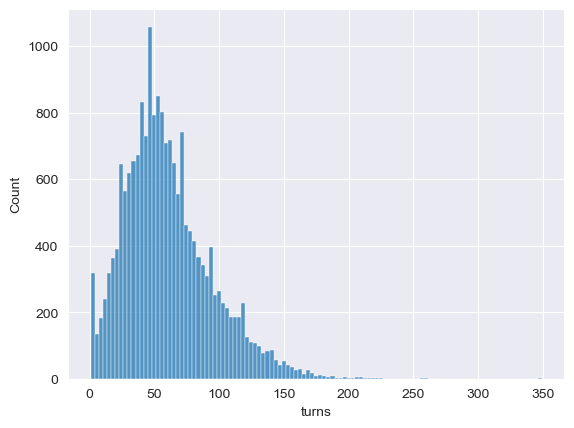

In [21]:
sns.histplot(data=working_data.turns)

### Victory Status

Checkmate is the penultimate form of victory. How common is it?

In [25]:
# Matches end in resignation nearly twice as often as they do in mate. (1.79 times)
working_data.victory_status.value_counts()

resign       10695
mate          5974
outoftime     1598
draw           846
Name: victory_status, dtype: int64

<AxesSubplot: >

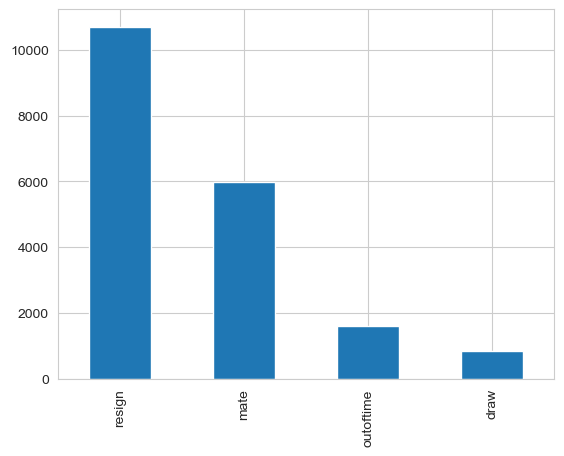

In [85]:
working_data.victory_status.value_counts().plot(kind='bar')

### Winner
Hmm, what is most interesting to know about the winner?

When white wins, is there a particularly successful opening? (Most frequent.) How far does that opening go by the book?
When black wins, is there a particularly unsuccessful opening? (Most frequent.) How far does that opening go by the book?
What are the most victory conditions for each color?

In [35]:
working_data.winner.value_counts()

white    9545
black    8680
draw      888
Name: winner, dtype: int64

### Increment code

10-minute Rapid is *incredibly* popular: these matches happen 5.8x as often as the next most-common time control, 15-minute Rapid. The shortest Blitz matches are 5+5. Does that mean that 3-minute Blitz has only become popular since this dataset was released (2017), or did Lichess simply not offer that time control?

In [36]:
working_data.increment_code.value_counts()

10+0      7356
15+0      1258
15+15      821
5+5        723
5+8        678
          ... 
17+2         1
14+5         1
90+120       1
11+7         1
14+15        1
Name: increment_code, Length: 400, dtype: int64

In [37]:
# I need to remember/relearn how to print statements based on categorical value counts.

5.847376788553259

### Player ID

In [89]:
working_data.white_id.nunique()

9438

In [90]:
working_data.black_id.nunique()

9331

In [40]:
working_data.white_id.value_counts()

ssf7             48
bleda            48
hassan1365416    44
khelil           41
1240100948       38
                 ..
giuseppepiro      1
izafiyet35        1
teldja54          1
learner0011       1
marcodisogno      1
Name: white_id, Length: 9438, dtype: int64

In [41]:
working_data.black_id.value_counts()

docboss        44
cape217        38
amanan         33
erikweisz      31
jdbarger       30
               ..
futmas          1
chambaru        1
nobrainhere     1
citragang       1
ffbob           1
Name: black_id, Length: 9331, dtype: int64

### Player Ratings and Differentials

In [42]:
working_data.white_rating.describe()

count   19113.00
mean     1597.30
std       290.02
min       784.00
25%      1401.00
50%      1567.00
75%      1792.00
max      2700.00
Name: white_rating, dtype: float64

In [81]:
working_data.black_rating.describe()

count   19113.00
mean     1590.05
std       290.44
min       789.00
25%      1394.00
50%      1563.00
75%      1785.00
max      2723.00
Name: black_rating, dtype: float64

<AxesSubplot: >

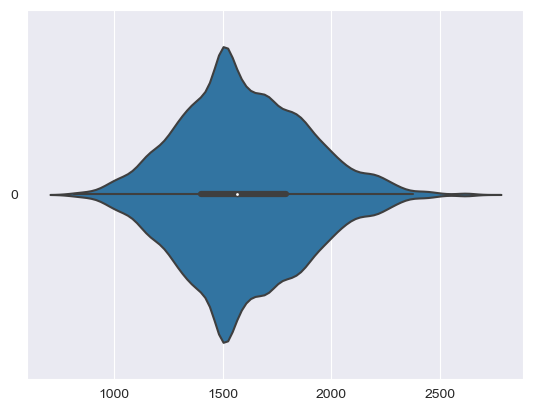

In [45]:
# Normal-ish distribution for white_rating
sns.violinplot(working_data.white_rating, orient='h')

<AxesSubplot: >

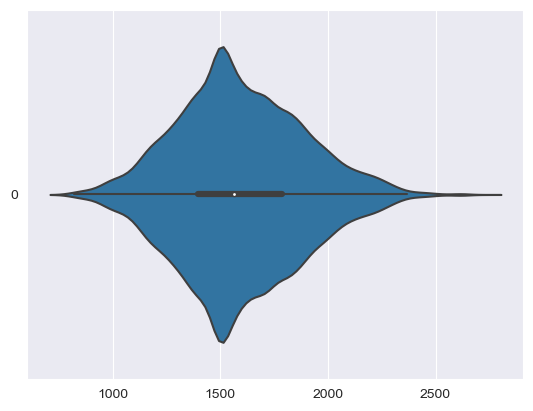

In [49]:
# Very similar to the white rating distribution. The obvious modes are interesting.
sns.violinplot(working_data.black_rating, orient='h')

<AxesSubplot: >

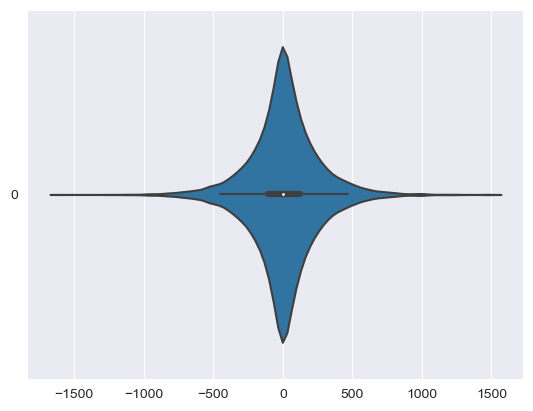

In [51]:
# Very normal and centered about zero. Beautiful.
sns.violinplot(working_data.rating_diff, orient='h')

### Moves
The moves are a string containing the moves in algebraic notation. This column is interesting as supplemental analysis of other variables. (E.g., determining whether the `book_plys` variable only applies to white, generating walkthroughs of novel games, etc.)

### Opening ECO
Openings are classified by type in the [Encyclopedia of Chess Openings](https://en.wikipedia.org/wiki/Encyclopaedia_of_Chess_Openings). They map loosely to the `opening_name` column.

In [53]:
working_data.opening_eco.value_counts()

A00    948
C00    810
D00    701
B01    688
C41    650
      ... 
C32      1
A67      1
E18      1
D95      1
D19      1
Name: opening_eco, Length: 365, dtype: int64

In [62]:
# The French defense, Philidor's defense, and the Van't Kruijs opening are the most popular openings when white wins. Queen's Gambit Declined is the opening with which white wins the least.
working_data.query('winner == "white"').opening_eco.value_counts()

C00    402
C41    374
A00    374
B00    343
B01    343
      ... 
A67      1
E42      1
D95      1
A97      1
D19      1
Name: opening_eco, Length: 327, dtype: int64

In [68]:
# The Van't Kruijs opening is much more common in games where black wins.
working_data.query('winner == "black"').opening_eco.value_counts()

A00    538
C00    372
D00    340
C20    334
B01    319
      ... 
B82      1
D22      1
B73      1
E46      1
C08      1
Name: opening_eco, Length: 317, dtype: int64

### Opening Plays
In theory, sticking to book moves as closely as possible gets players to the best middle game. `opening_ply` are the number of *half-moves* by the book: an `opening_ply` of `4` means that the game stuck to theory for two turns, or four half-moves.

<AxesSubplot: >

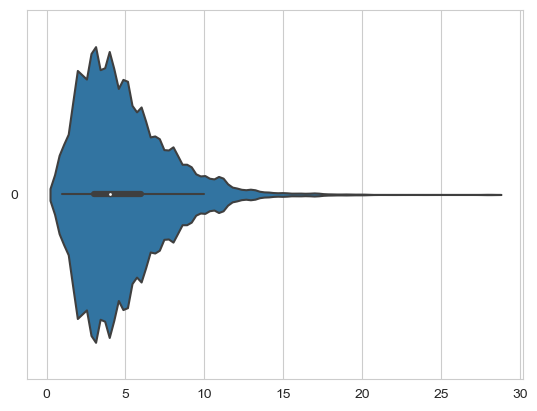

In [75]:
sns.violinplot(working_data.opening_ply, orient='h')

In [76]:
# The median number of turns by the book is two. The upper end of the distribution is three turns by the book.
working_data.opening_ply.describe()

count   19113.00
mean        4.82
std         2.80
min         1.00
25%         3.00
50%         4.00
75%         6.00
max        28.00
Name: opening_ply, dtype: float64

In [80]:
# Let's see more info about the games that went 14 full turns by the book.
# These games all featured high-level players playing the Modern Main Line of the Ruy Lopez Marshall Attack.
working_data.query('opening_ply == 28')

,id,rated,created_at,last_move_at,turns,victory_status,winner,increment_code,white_id,white_rating,black_id,black_rating,moves,opening_eco,opening_name,opening_ply,game_length,rating_diff
4475,9bIIqx54,False,1480830000000.00,1480840000000.00,32,outoftime,black,5+5,ranchowangdu,1500,boseayan,2021,e4 e5 Nf3 Nc6 Bb5 a6 Ba4 Nf6 O-O Be7 c3 O-O Re...,C89,Ruy Lopez: Marshall Attack | Modern Main Line,28,10000000.00,-521
16443,BjplwwJ1,True,1481225286257.00,1481225591868.00,34,resign,black,10+0,ramin741,1835,bassem1963,1733,e4 e5 Nf3 Nc6 Bb5 a6 Ba4 Nf6 O-O b5 Bb3 Be7 Re...,C89,Ruy Lopez: Marshall Attack | Modern Main Line,28,305611.00,102
17900,Ms2THNEC,True,1504183548250.00,1504183846674.00,45,resign,black,3+8,bratancb,2000,bosspotato,2289,e4 e5 Nf3 Nc6 Bb5 a6 Ba4 Nf6 O-O Be7 Re1 b5 Bb...,C89,Ruy Lopez: Marshall Attack | Modern Main Line,28,298424.00,-289
19412,YaQWFwbu,True,1502744246155.00,1502744505534.00,61,resign,white,10+0,balikoevsd,1857,craciun05,1916,e4 e5 Nf3 Nc6 Bb5 a6 Ba4 Nf6 O-O Be7 Re1 b5 Bb...,C89,Ruy Lopez: Marshall Attack | Modern Main Line,28,259379.00,-59
